# Importing Required Libraries

In [322]:
import json
import pickle
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Making lists to store words, classes and documents

In [323]:
words = []
classes = []
documents = []

# List of characters to ignore

In [324]:
ignore_characters = ['?', '!']

# Opening and Loading the Dataset 

In [325]:
data_file = open('intents.json').read()
intents = json.loads(data_file)

# Updating the words, classes and documents lists

In [326]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #Tokenizing each word from pattern into the word list
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        
        #Adding documents into the collection (corpus)
        documents.append((w, intent['tag']))

        #Adding unique tags into the classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Text pre-processing (lower case, remove non-alphanumeric characters and lemmatize text)

In [327]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_characters]
words = sorted(list(set(words)))

# Sorting the classes list

In [328]:
classes = sorted(list(set(classes)))

# Documents list is a combination between intents and patterns

In [329]:
print (len(documents), "documents")

154 documents


# Classes list is the intents

In [330]:
print (len(classes), "classes", classes)

39 classes ['anxiety_causes', 'anxiety_disorders', 'anxiety_symptoms', 'anxiety_treatment', 'bipolar_causes', 'bipolar_disorder', 'bipolar_symptoms', 'bipolar_treatment', 'canada_helpline', 'depression', 'depression_causes', 'depression_symptoms', 'depression_treatment', 'eating_disorder', 'generalized_disorder', 'goodbye', 'greeting', 'helpline_select', 'helpline_select_app', 'helpline_select_group', 'mental_health', 'mental_health_illness', 'mental_illness', 'mental_illness_causes', 'mental_illness_symptoms', 'mental_illness_types', 'mental_treatment', 'noanswer', 'obsessive_disorder', 'options', 'panic_disorder', 'personality_disorders', 'phobias', 'post_disorder', 'post_symptoms', 'schizophrenia', 'social_phobia', 'specific_phobia', 'thanks']


# Words list is all the unique words

In [331]:
print (len(words), "unique lemmatized words", words)

110 unique lemmatized words ["'s", ',', '.', '1', '2', '3', 'a', 'about', 'and', 'anxiety', 'any', 'anyone', 'apps', 'are', 'available', 'awesome', 'better', 'bipolar', 'both', 'bye', 'call', 'can', 'canada', 'care', 'cause', 'chat', 'chatting', 'concern', 'contact', 'could', 'day', 'depression', 'detail', 'different', 'disorder', 'do', 'eating', 'factor', 'for', 'generalized', 'get', 'give', 'good', 'goodbye', 'group', 'have', 'health', 'hello', 'help', 'helpful', 'helping', 'helpline', 'hey', 'hi', 'how', 'i', 'illness', 'in', 'information', 'is', 'issue', 'later', 'me', 'mental', 'more', 'my', 'next', 'nice', 'number', 'obsessive-compulsive', 'of', 'on', 'online', 'panic', 'peer', 'personality', 'phobia', 'phone', 'post-traumatic', 'provide', 'regarding', 'resource', 'same', 'schizophrenia', 'see', 'service', 'should', 'social', 'some', 'specific', 'stress', 'symptom', 'take', 'tell', 'text', 'thank', 'thanks', 'that', 'the', 'there', 'they', 'till', 'time', 'to', 'treat', 'treatmen

# Converting the words and classes lists from objects into byte-stream and storing in respective pickle files

In [332]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

# Creating a list for the training data

In [333]:
training = []

# Creating and empty array to store the outputs

In [334]:
output_empty = [0] * len(classes)

# Training set will consist of bag of words for each text sentence

In [335]:
for doc in documents:
    # Creating the bag of words list
    bag = []
    
    # Creating a list of tokenized words for the pattern
    pattern_words = doc[0]
    
    # Lemmatizing each word - Creating base lemma words in an attempt to represent relative words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    # Creating the bag of words array with 1, if word match is found in the current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # Output will be '0' for each tag and '1' will be for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])

# Shuffling the features and turning them into a numpy array

In [336]:
random.shuffle(training)
training = np.array(training)

C:\Users\Admin\AppData\Local\Temp/ipykernel_13280/2195589081.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


# Creating the training and testing lists. X is the patterns, Y is the intents

In [337]:
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


# Creating the model - 3 layers. First layer contains 128 neurons, second layer contains 64 neurons and third output layer contains number of neurons that are equal to number of intents for predicting the output intent with softmax

In [338]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compiling the model. Using stochastic gradient descent with Nesterov accelerated gradient gives good results for the model

In [339]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting and saving the model for future use

In [340]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=600, batch_size=8, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/600
20/20 [==============================] - 1s 3ms/step - loss: 3.6736 - accuracy: 0.0260
Epoch 2/600
20/20 [==============================] - 0s 4ms/step - loss: 3.6308 - accuracy: 0.0519
Epoch 3/600
20/20 [==============================] - 0s 5ms/step - loss: 3.5802 - accuracy: 0.0519
Epoch 4/600
20/20 [==============================] - 0s 4ms/step - loss: 3.4829 - accuracy: 0.0649
Epoch 5/600
20/20 [==============================] - 0s 5ms/step - loss: 3.4324 - accuracy: 0.0779
Epoch 6/600
20/20 [==============================] - 0s 4ms/step - loss: 3.3603 - accuracy: 0.1039
Epoch 7/600
20/20 [==============================] - 0s 4ms/step - loss: 3.2703 - accuracy: 0.1169
Epoch 8/600
20/20 [==============================] - 0s 5ms/step - loss: 3.1930 - accuracy: 0.1364
Epoch 9/600
20/20 [==============================] - 0s 5ms/step - loss: 3.0298 - accuracy: 0.1364
Epoch 10/600
20/20 [==============================] - 0s 4ms/step - loss: 2.9668 - accuracy: 0.2013
Epoch 11/

Epoch 83/600
20/20 [==============================] - 0s 5ms/step - loss: 0.4341 - accuracy: 0.8701
Epoch 84/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8701
Epoch 85/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8442
Epoch 86/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8636
Epoch 87/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8442
Epoch 88/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.8831
Epoch 89/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3688 - accuracy: 0.8701
Epoch 90/600
20/20 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8831
Epoch 91/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.9091
Epoch 92/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.8571


20/20 [==============================] - 0s 4ms/step - loss: 0.2763 - accuracy: 0.9026
Epoch 165/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.9156
Epoch 166/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2014 - accuracy: 0.9416
Epoch 167/600
20/20 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.9156
Epoch 168/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.9091
Epoch 169/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.9286
Epoch 170/600
20/20 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9221
Epoch 171/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1935 - accuracy: 0.9545
Epoch 172/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2336 - accuracy: 0.9221
Epoch 173/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 0.9156
Epoc

20/20 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9481
Epoch 245/600
20/20 [==============================] - 0s 7ms/step - loss: 0.2157 - accuracy: 0.9156
Epoch 246/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1452 - accuracy: 0.9416
Epoch 247/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1737 - accuracy: 0.9156
Epoch 248/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 0.9156
Epoch 249/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1170 - accuracy: 0.9416
Epoch 250/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1448 - accuracy: 0.9545
Epoch 251/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2612 - accuracy: 0.9286
Epoch 252/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1266 - accuracy: 0.9416
Epoch 253/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.9545
Epoc

20/20 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9351
Epoch 325/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1488 - accuracy: 0.9416
Epoch 326/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1917 - accuracy: 0.9221
Epoch 327/600
20/20 [==============================] - 0s 6ms/step - loss: 0.1474 - accuracy: 0.9481
Epoch 328/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1545 - accuracy: 0.9221
Epoch 329/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9481
Epoch 330/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9351
Epoch 331/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9351
Epoch 332/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1275 - accuracy: 0.9481
Epoch 333/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9416
Epoc

20/20 [==============================] - 0s 7ms/step - loss: 0.1550 - accuracy: 0.9481
Epoch 406/600
20/20 [==============================] - 0s 8ms/step - loss: 0.1725 - accuracy: 0.9416
Epoch 407/600
20/20 [==============================] - 0s 9ms/step - loss: 0.1759 - accuracy: 0.9221: 0s - loss: 0.2041 - accuracy: 0.
Epoch 408/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1304 - accuracy: 0.9481
Epoch 409/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1392 - accuracy: 0.9481
Epoch 410/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9545
Epoch 411/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1841 - accuracy: 0.9221
Epoch 412/600
20/20 [==============================] - 0s 6ms/step - loss: 0.0784 - accuracy: 0.9675
Epoch 413/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9481
Epoch 414/600
20/20 [==============================] - 0s 4ms/step - lo

20/20 [==============================] - 0s 5ms/step - loss: 0.2290 - accuracy: 0.9286
Epoch 485/600
20/20 [==============================] - 0s 5ms/step - loss: 0.0999 - accuracy: 0.9481
Epoch 486/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.9221: 0s - loss: 0.2223 - accuracy: 0.90
Epoch 487/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1873 - accuracy: 0.9351
Epoch 488/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1803 - accuracy: 0.9286
Epoch 489/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9221
Epoch 490/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.8961
Epoch 491/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1362 - accuracy: 0.9481
Epoch 492/600
20/20 [==============================] - 0s 9ms/step - loss: 0.1416 - accuracy: 0.9286
Epoch 493/600
20/20 [==============================] - 0s 7ms/step - 

20/20 [==============================] - 0s 4ms/step - loss: 0.1557 - accuracy: 0.9416
Epoch 565/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1228 - accuracy: 0.9481
Epoch 566/600
20/20 [==============================] - 0s 7ms/step - loss: 0.1600 - accuracy: 0.9286
Epoch 567/600
20/20 [==============================] - 0s 8ms/step - loss: 0.1040 - accuracy: 0.9545
Epoch 568/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1194 - accuracy: 0.9545
Epoch 569/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1407 - accuracy: 0.9481
Epoch 570/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9481
Epoch 571/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1545 - accuracy: 0.9416
Epoch 572/600
20/20 [==============================] - 0s 6ms/step - loss: 0.1580 - accuracy: 0.9221
Epoch 573/600
20/20 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.93 - 0s 6ms/s

In [341]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

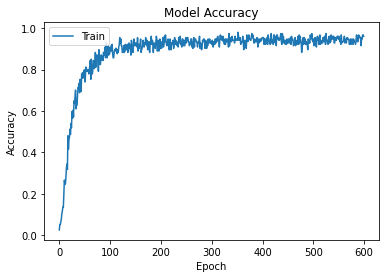

In [342]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

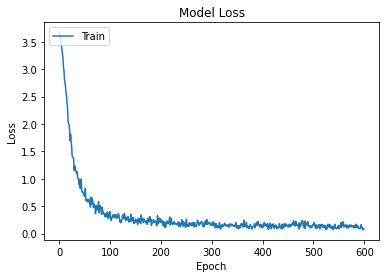

In [343]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()